# 0.0 IMPORTS


## 0.1 Helper Functions

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import inflection
import math


from IPython.core.display import HTML

# 0.2 Loading Data

In [21]:
df_sales_raw = pd.read_csv('data/train.csv',low_memory=False)
df_store_raw = pd.read_csv('data/store.csv',low_memory=False)

#Merge
df_raw = pd.merge( df_sales_raw, df_store_raw, how='left', on='Store')

# 1.0 DATA DESCRIPTION 

In [22]:
df1 = df_raw.copy()

In [23]:
df_raw.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

### 1.1 Rename Columns

In [24]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo','StateHoliday', 'SchoolHoliday',
            'StoreType', 'Assortment','CompetitionDistance', 'CompetitionOpenSinceMonth','CompetitionOpenSinceYear', 
            'Promo2', 'Promo2SinceWeek','Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore( x ) 

cols_new = list( map( snakecase, cols_old) ) 

#Rename
df1.columns = cols_new


### 1.2 Data Dimensions

In [25]:
print( 'Number of Rows: {}'.format(df1.shape[0] ) ) 
print( 'Number of Cols: {}'.format(df1.shape[1] ) ) 

Number of Rows: 1017209
Number of Cols: 18


### 1.3 Data Types 

In [26]:
df1['date'] = pd.to_datetime( df1['date'] )
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

### 1.4 Check N/A

In [27]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

### 1.5 Fillout N/A

In [28]:
df1['competition_distance'].max()

np.float64(75860.0)

In [29]:
# competition_distance 

df1['competition_distance'] = df1['competition_distance'].apply( lambda x: 200000.0 if math.isnan( x ) else x ) 

# competition_open_since_month

df1[ 'competition_open_since_month'] = df1.apply( lambda x: x['date'].month if math.isnan( x['competition_open_since_month'] ) else x['competition_open_since_month'], axis=1 )

# competition_open_since_year 

df1[ 'competition_open_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan( x['competition_open_since_year'] ) else x['competition_open_since_year'], axis=1 )
                            
# promo2_since_week

df1[ 'promo2_since_week'] = df1.apply( lambda x: x['date'].week if math.isnan( x['promo2_since_week'] ) else x['promo2_since_week'], axis=1 )

# promo2_since_year   

df1[ 'promo2_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan( x['promo2_since_year'] ) else x['promo2_since_year'], axis=1 )

# promo_interval  

month_map = { 1: 'Jan', 2: 'Fev', 3:'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

df1['promo_interval'] = df1['promo_interval'].fillna(0)


df1['month_map'] = df1['date'].dt.month.map(month_map)

df1[ 'is_promo' ] = df1[[ 'promo_interval', 'month_map']].apply( lambda x: 0 if x['promo_interval' ] == 0 else 1 if x['month_map'] in x['promo_interval'].split( ',' )else 0, axis=1)



In [30]:
df1.sample(5).T

,579387,797098,943172,968169,526549
store,373,659,668,20,1055
day_of_week,2,3,5,3,1
date,2014-01-28 00:00:00,2013-07-17 00:00:00,2013-03-08 00:00:00,2013-02-13 00:00:00,2014-03-17 00:00:00
sales,2743,6842,9449,6101,10096
customers,224,800,1259,753,1117
open,1,1,1,1,1
promo,0,1,1,0,1
state_holiday,0,0,0,0,0
school_holiday,0,1,0,1,0
store_type,d,d,c,d,c


In [31]:
df1.isna().sum()


store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

### 1.6 Change types

In [32]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype( int )
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype( int )

df1['promo2_since_week'] = df1['promo2_since_week'].astype( int )
df1['promo2_since_year'] = df1['promo2_since_year'].astype( int )

### 1.7 Descriptive Statistical

In [33]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] ) 
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] ) 

In [34]:
num_attributes.sample(2)

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo
522550,401,4,6358,636,1,1,0,9200.0,10,2009,1,14,2012,0
543477,143,6,6293,576,1,0,0,2930.0,12,2002,0,9,2014,0


In [35]:
cat_attributes.sample(2)

,state_holiday,store_type,assortment,promo_interval,month_map
236159,a,a,c,0,Jan
367298,0,c,c,"Jan,Apr,Jul,Oct",Aug


### 1.1 Numerical Attributes

In [36]:
# Central Tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispesion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# Concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6 ] ).T.reset_index()
display(m)


,index,0,0,0,0,0,0,0,0
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


/var/folders/vp/z0zsw7sd3z1g0l663x5px37r0000gn/T/ipykernel_4485/3866287872.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df1 ['sales'] )


<Axes: xlabel='sales', ylabel='Density'>

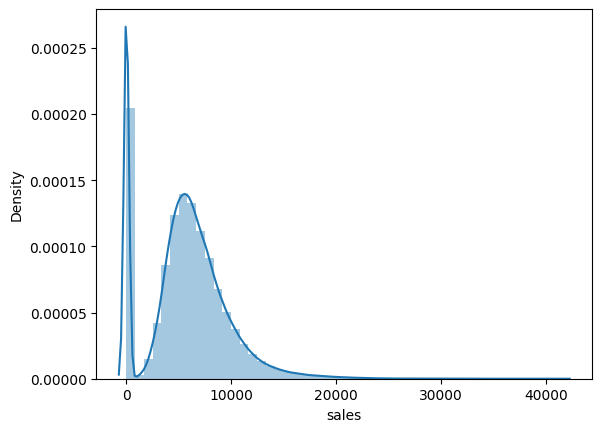

In [39]:
sns.distplot( df1 ['sales'] )

### 1.7.2 Categorical Attributes

In [42]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<Figure size 1200x500 with 0 Axes>

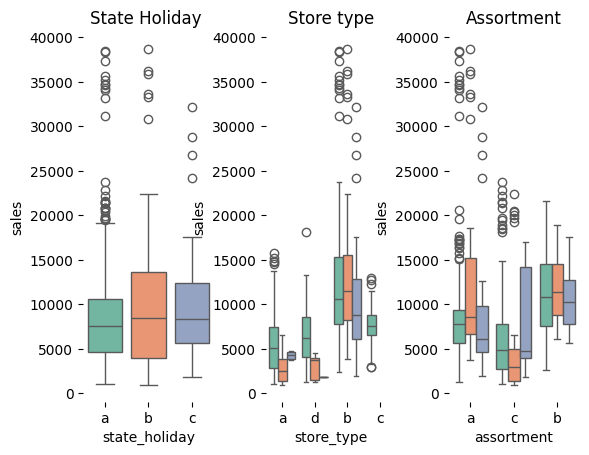

<Figure size 1200x500 with 0 Axes>

In [58]:
aux1 = df1 [ ( df1[ 'state_holiday'] != '0' ) & ( df1['sales'] > 0) ]

plt.subplot( 1, 3, 1)
sns.boxplot(x='state_holiday', y='sales', data=aux1, hue='state_holiday', palette='Set2', legend=False)
plt.title('State Holiday ')
sns.despine(left=True, bottom=True)

plt.subplot( 1, 3, 2)
sns.boxplot(x='store_type', y='sales', data=aux1, hue='state_holiday', palette='Set2', legend=False)
plt.title('Store type')
sns.despine(left=True, bottom=True)

plt.subplot( 1, 3, 3)
sns.boxplot(x='assortment', y='sales', data=aux1, hue='state_holiday', palette='Set2', legend=False)
plt.title('Assortment')
sns.despine(left=True, bottom=True)

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.figure(figsize=(12, 5))



### 1.1 